# Import packages and read data set

In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Add data set to data frame
df = pd.read_csv('/Users/Erik_Busk/Desktop/Analytics/Segmentation of mall customers/Mall_customers.csv')

In [3]:
# Examine data set columns
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Examine length of data set
len(df)

200

# Univariate Exploartory Analysis

In [5]:
# Exploer data set
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


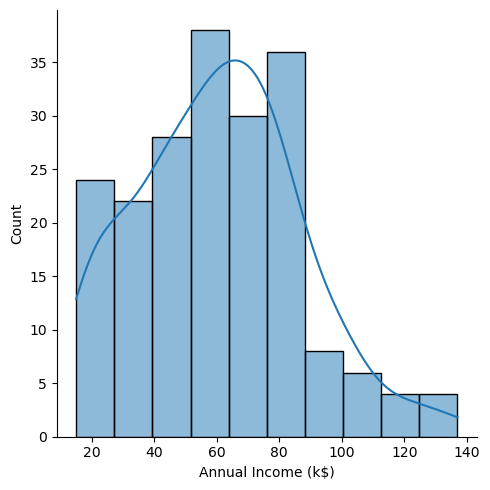

In [6]:
# Plot frequency of annual income categories
sns.displot(df['Annual Income (k$)'], kde=True)

<Figure size 640x480 with 0 Axes>

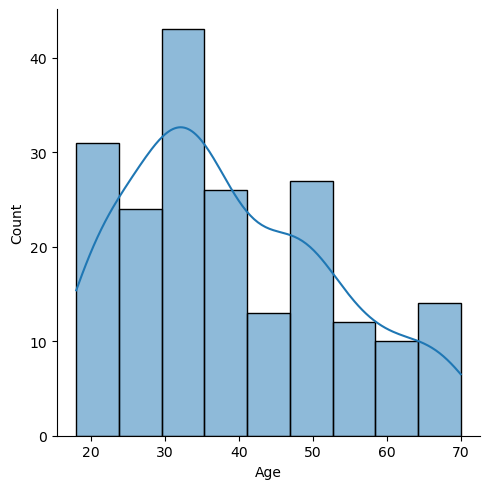

<Figure size 640x480 with 0 Axes>

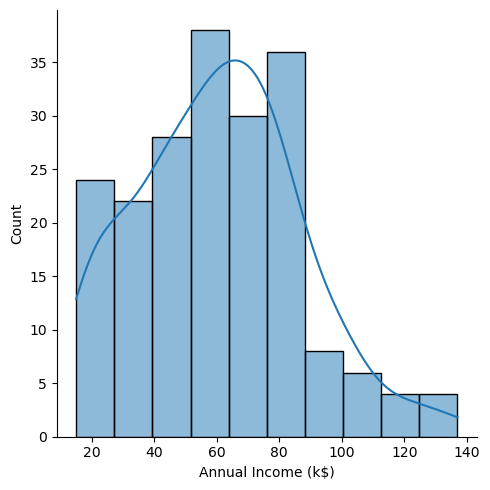

<Figure size 640x480 with 0 Axes>

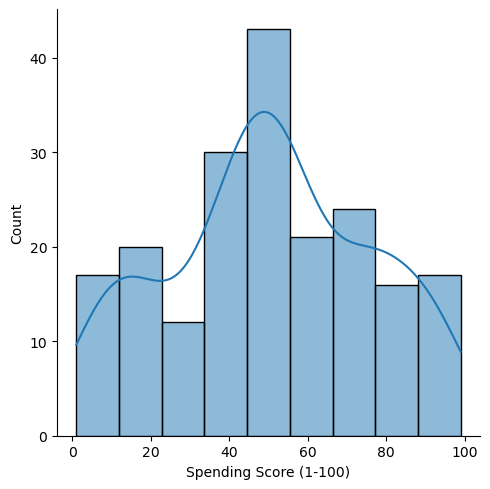

In [7]:
# Plot frequency of Age, Annual income and Spending score
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i], kde=True)

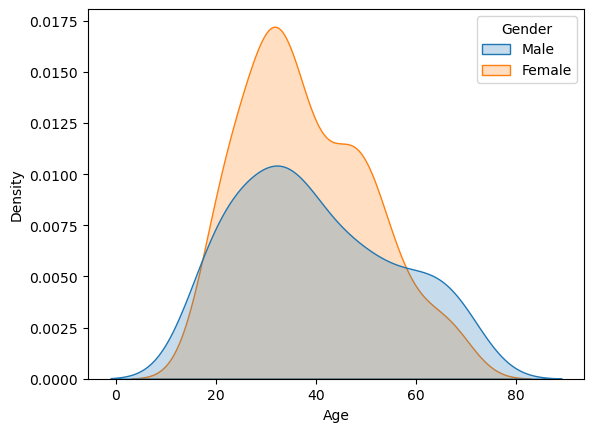

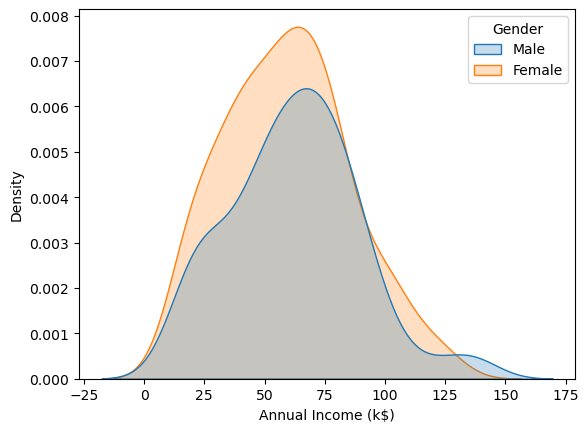

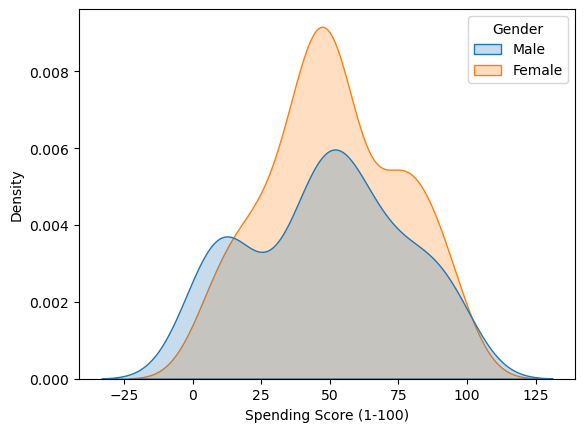

In [8]:
# Plot the same graphs but divided on Male and Female
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue='Gender', shade=True)

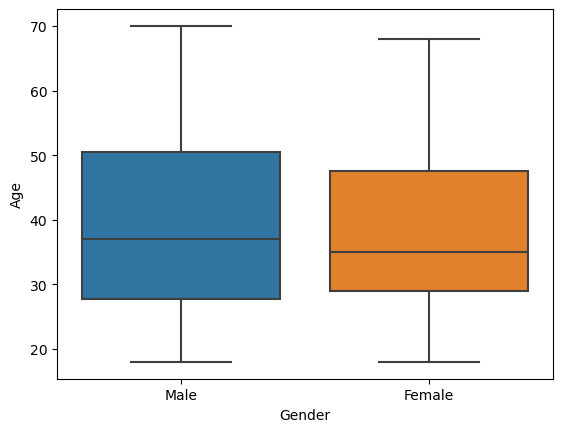

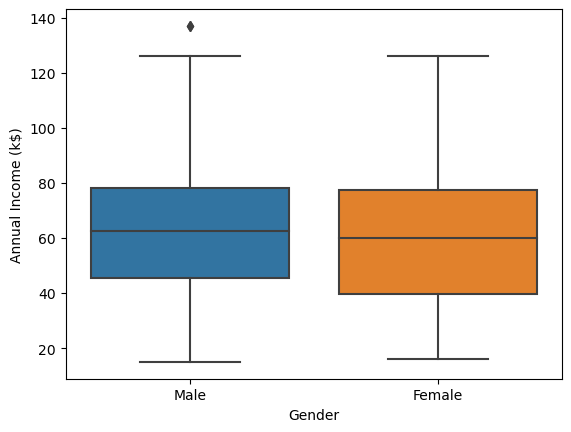

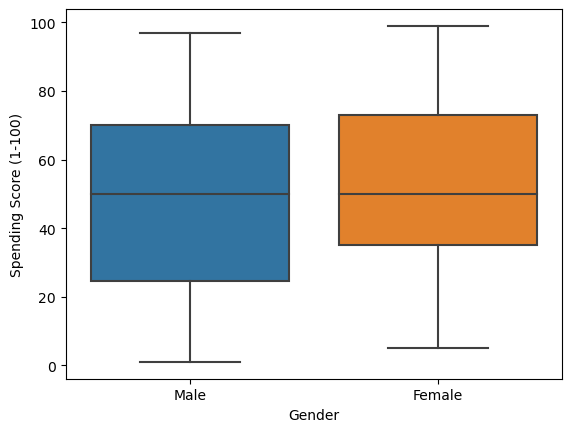

In [9]:
# Plot box diagrams for Age, Annual income and Spending score for the respective groups Male and Female
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [10]:
# Calculate share of each gender
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Exploratory Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

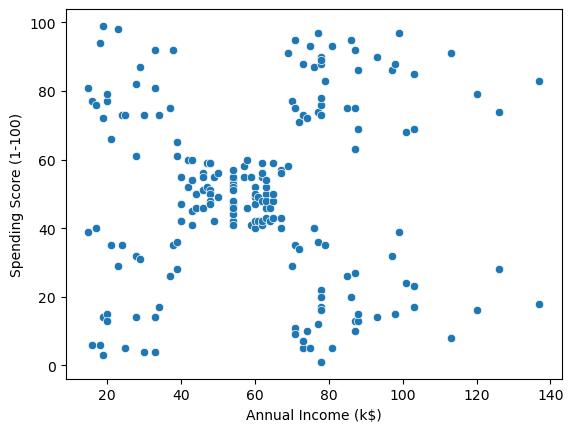

In [11]:
# Create scatterplot of Annual income in relation to spending score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

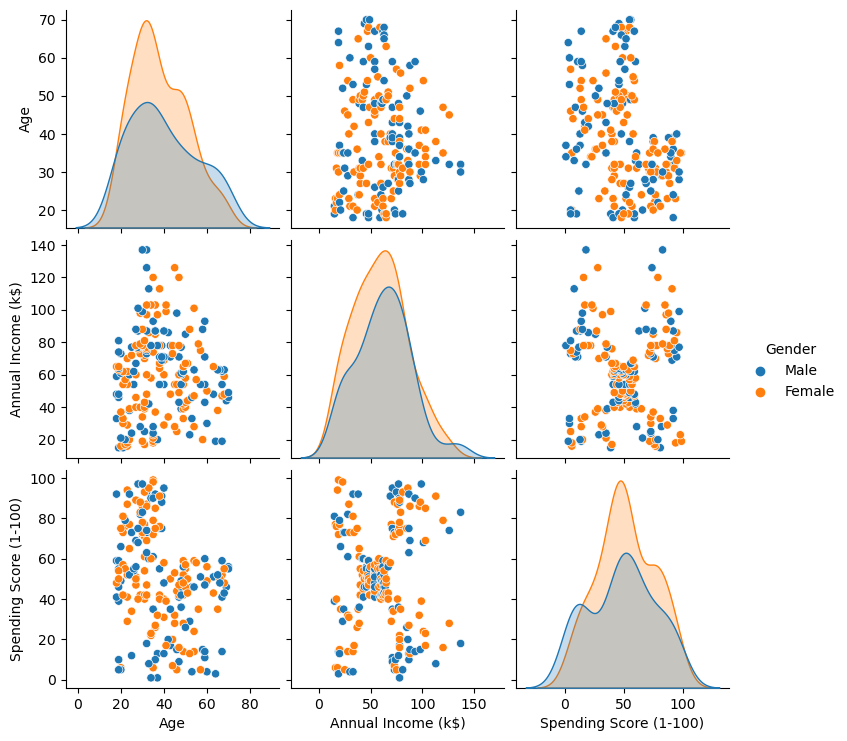

In [12]:
# Plot the different pair relations of the columns (not including CustomerID)
df=df.drop('CustomerID', axis=1)
sns.pairplot(df, hue = 'Gender')

In [13]:
# Calculate means for each gender
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
# Calculate correlations between the columns
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

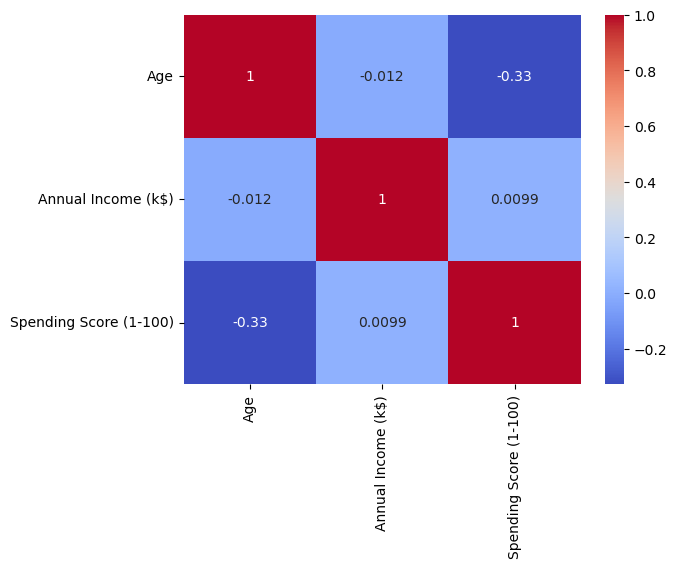

In [15]:
# Visualize correlations in heatmap
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')

# Clustering - Univariate, Bivariate

In [16]:
# Create a KMeans clustering model with 3 clusters (Based on elbow method, see further down)
clustering1 = KMeans(n_clusters=3)

In [17]:
# Fit the KMeans clustering model to the 'Annual Income (k$)' column of the dataframe
clustering1.fit(df[['Annual Income (k$)']].values)

KMeans(n_clusters=3)

In [18]:
# Get the cluster labels assigned to each data point by the KMeans clustering model
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [19]:
# Add a new column to the dataframe containing the cluster labels assigned to each data point
df['Income Cluster'] = clustering1.labels_

In [20]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [21]:
# See how many customers belong to each cluster
df['Income Cluster'].value_counts()

Income Cluster
2    90
1    74
0    36
Name: count, dtype: int64

In [22]:
# Get the inertia of the KMeans clustering model
clustering1.inertia_

23517.33093093093

In [23]:
# Create a list of the inertia scpres through the range of 1 to 10 clusters
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [24]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 24361.259213759207,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3949.275613275612,
 2822.4996947496966,
 2173.2874458874467,
 1849.219444444444]

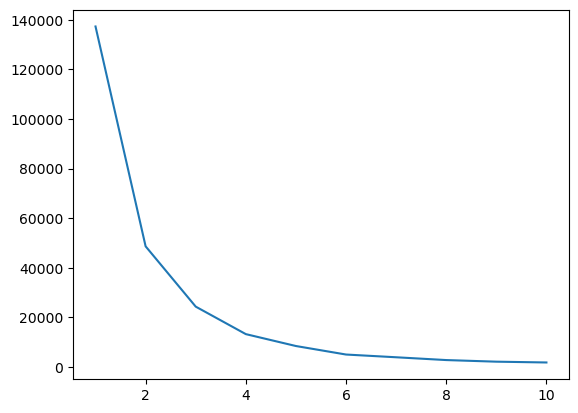

In [25]:
# Plot inertia scores
# Elbow was identified at n = 3
plt.plot(range(1,11),inertia_scores)

In [26]:
# Calculate mean values for each cluster
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


# Bivariate Clustering

In [27]:
# Create a KMeans clustering model with 5 clusters (Based on elbow method, see further down)
# Fit the KMeans clustering model to the 'Annual Income (k$) AND Spending Score (1-100) columns of the dataframe
# Get the cluster labels assigned to each data point by the KMeans clustering model
clustering2 = KMeans(n_clusters = 5)
clustering2 = clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


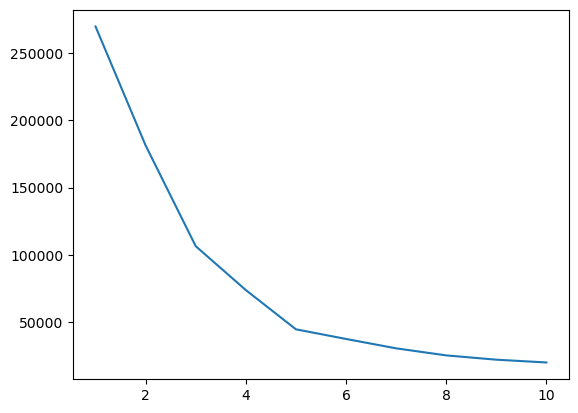

In [28]:
# Create a list of the inertia scores through the range of 1 to 10 clusters
# Plot
# 5 can be identified as an appropariate number for n using the elbow method
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [29]:
# Create a DataFrame for the centers of the clusters
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

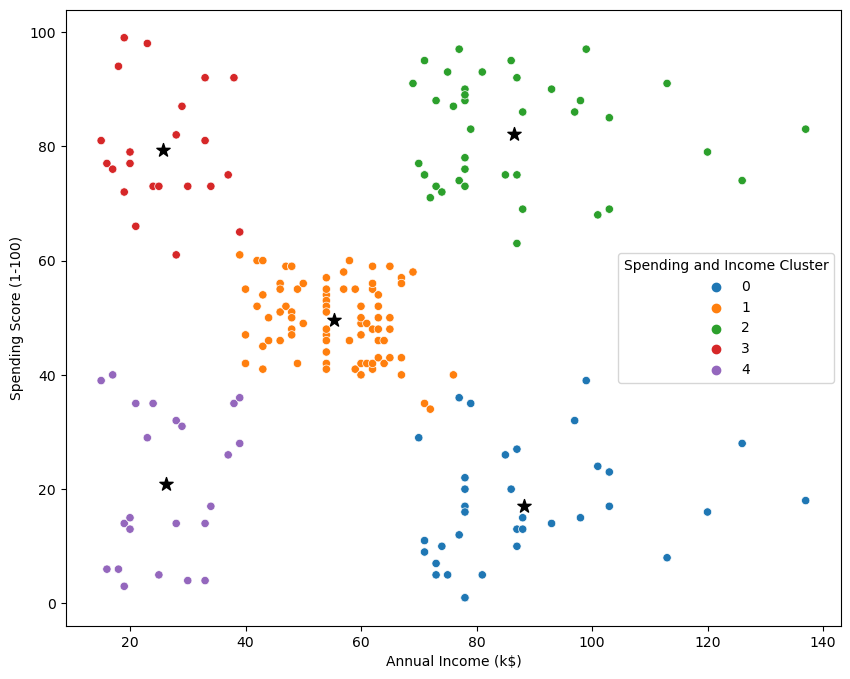

In [30]:
# Plot the clusters as well as the centers. Showing the relation between Spending Score and Annual Income
plt.figure(figsize = (10,8))
plt.scatter(x = centers['x'], y = centers['y'], s= 100, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10')
plt.savefig('clustering_bivariate.png')

In [31]:
# Calculate share of Male and Female customers in each cluster
pd.crosstab([df['Spending and Income Cluster']], columns=df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [32]:
# Calculate the mean values for each of the clusters
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [33]:
# Conlusion is that cluster 0 has a high spending score and high annual income. This means that it can be an attractive customer segment for us to run campaigns for. These customers are on average 33 years old and the segment comprises slightly more females than males